In [2]:
#Credit Card Approval Prediction Model

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [ ]:
#Application Data Record Set

In [4]:
appdf=pd.read_csv('application_record.csv')
appdf.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [5]:
appdf.shape

(438557, 18)

In [6]:
appdf.keys()

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [7]:
appdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [8]:
appdf.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [9]:
appdf.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [10]:
appdf.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [11]:
#Credit Records dataset

In [12]:
creditdf=pd.read_csv('credit_record.csv')

In [13]:
creditdf.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [15]:
creditdf.shape

(1048575, 3)

In [16]:
creditdf.keys()

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [17]:
creditdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [18]:
creditdf.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [19]:
creditdf.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [20]:
creditdf.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [ ]:
#Application Records Count Plot

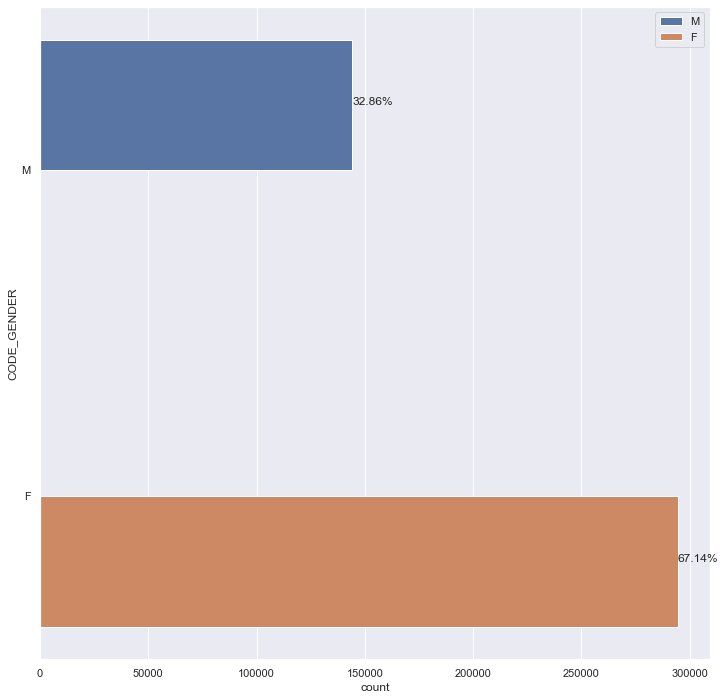

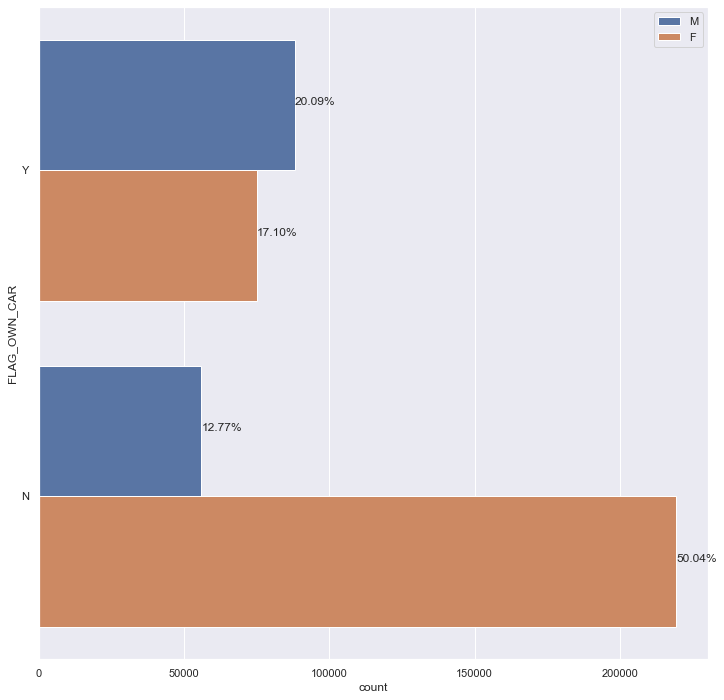

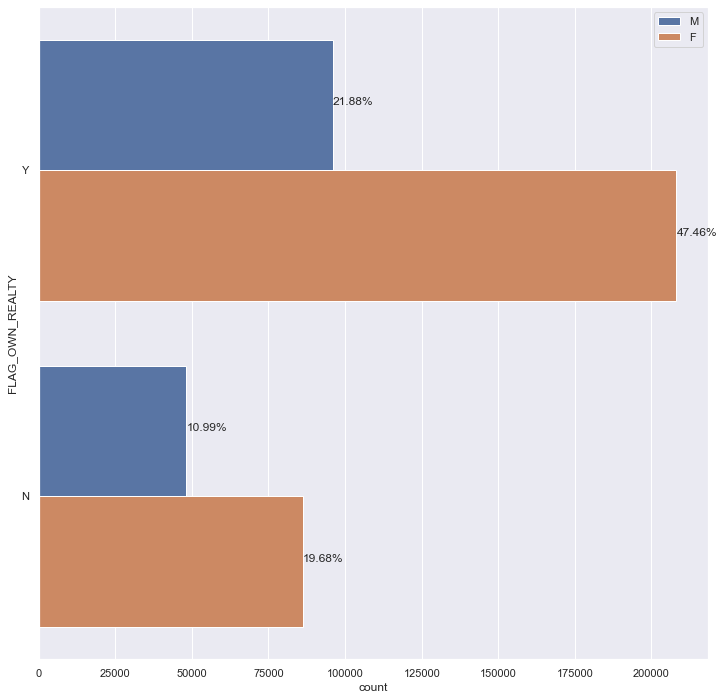

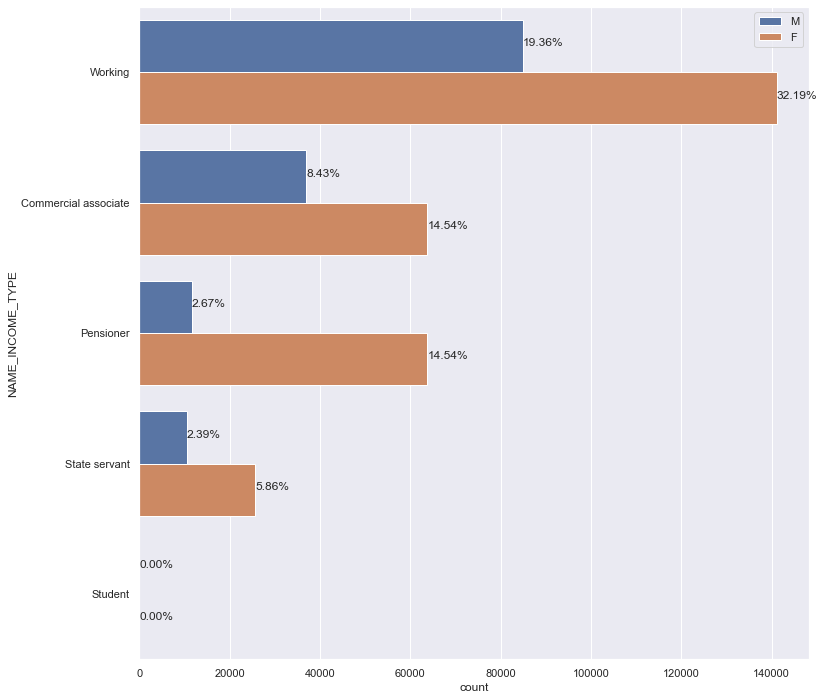

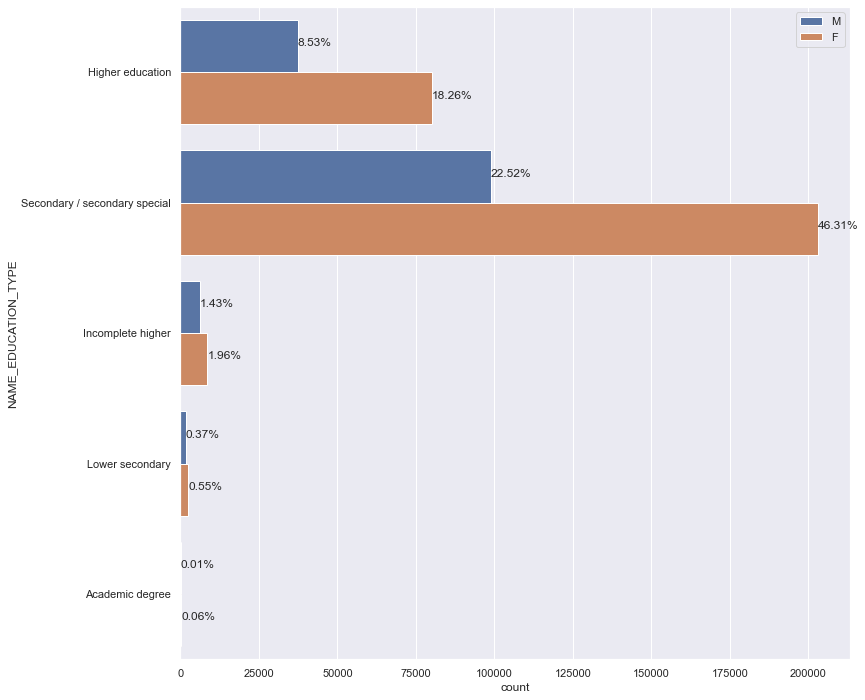

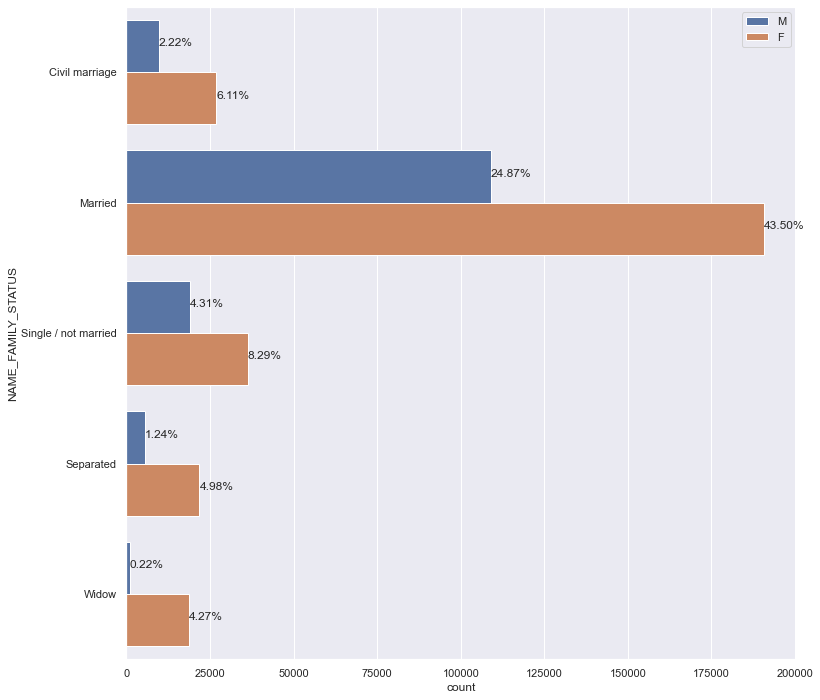

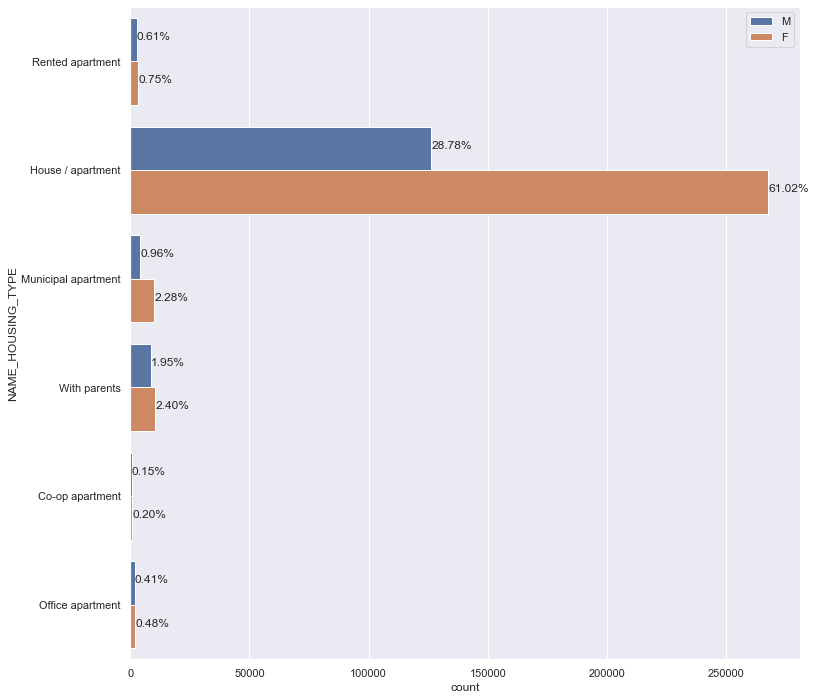

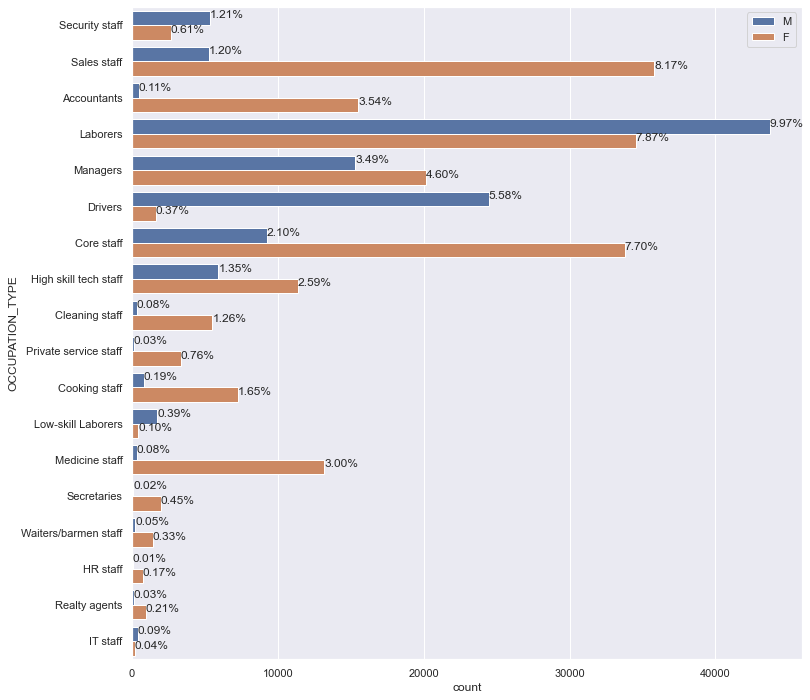

In [22]:
def countplot_appdf(app_features, app_hue):
    for app_feature in app_features:
        
        plt.figure(figsize = (12, 12))
        ax = sns.countplot(y = appdf[app_feature], hue = app_hue , data = appdf)
        plt.legend(loc = 'best')
        n = len(appdf[app_feature])
        
        for bar in ax.patches:
            percentage = '{:.2f}%'.format(100 * bar.get_width()/n)
            x = bar.get_x() + bar.get_width() + 0.05
            y = bar.get_y() + bar.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()
    
app_features = []
for column in appdf.columns:
    if (appdf[column].dtype == 'object'):
        app_features.append(column)

countplot_appdf(app_features, 'CODE_GENDER')

In [23]:
#Credit Record Count Plots

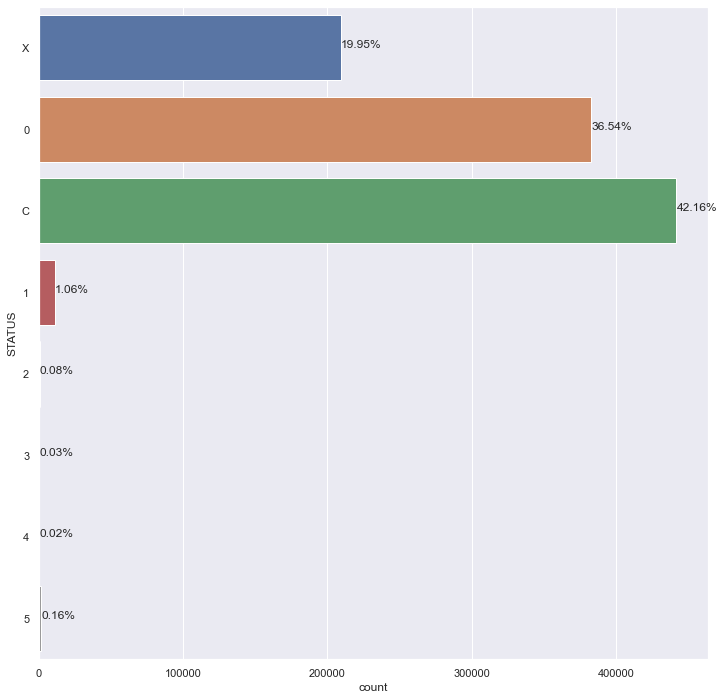

In [25]:
def countplot_creditdf(credit_features):
    for credit_feature in credit_features:
        
        plt.figure(figsize = (12, 12))
        ax = sns.countplot(y = creditdf[credit_feature], data = creditdf)
        n = len(creditdf[credit_feature])
        
        for bar in ax.patches:
            percentage = '{:.2f}%'.format(100 * bar.get_width()/n)
            x = bar.get_x() + bar.get_width() + 0.05
            y = bar.get_y() + bar.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()
    
credit_features = []
for column in creditdf.columns:
    if (creditdf[column].dtype == 'object'):
        credit_features.append(column)

countplot_creditdf(credit_features)

In [26]:
#Data Cleaning

In [27]:
#Appliaction Records Dataset


In [28]:
#Insert Age Column and Drop DAYS_BIRTH Column

In [29]:
age=[]
for i in range(0,len(appdf)):
    res=(abs(appdf['DAYS_BIRTH'][i]) // 365.25)
    age.append(res)

In [30]:
appdf.insert(11,'AGE',age)
appdf.drop(['DAYS_BIRTH'], axis = 1, inplace = True)

In [31]:
#Converting employed days of unemployed people to 0

In [33]:
appdf.loc[(appdf['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0

In [34]:
### Insert 'EMPLOYED_YEARS' column and drop 'DAYS_EMPLOYED' column

In [35]:
employed_years = []

for j in range(0, len(appdf)):
    res1 = (abs(appdf['DAYS_EMPLOYED'][j]) // 365.25)
    employed_years.append(res1)

In [36]:
appdf.insert(13,'EMPLOYED_YEARS', employed_years)
appdf.drop(['DAYS_EMPLOYED'], axis = 1, inplace = True)

In [37]:
#Drop Duplicate ID's

In [38]:
appdf.drop_duplicates(subset = ['ID'], inplace=True)

In [39]:
### Remove 'FLAG_MOBIL' column as unique value is only 1

In [40]:
appdf.drop(['FLAG_MOBIL'], axis = 1, inplace=True)

In [41]:
### Filling NaN values in 'OCCUPATION_TYPE' column

In [42]:
appdf['OCCUPATION_TYPE'].fillna(value = 'Occupation Not Identified', inplace=True)

In [43]:
### Mentioning 'OCCUPATION_TYPE'  as 'Retired' of those having 'NAME_INCOME_TYPE' as 'Pensioner'

In [44]:
appdf.loc[(appdf['NAME_INCOME_TYPE'] == 'Pensioner') & (appdf['OCCUPATION_TYPE'] == 'Occupation Not Identified'), 'OCCUPATION_TYPE'] = 'Retired'

In [45]:
### Credit Records Dataset

In [46]:
#Drop duplicate values

In [47]:
creditdf[['ID', 'MONTHS_BALANCE']].drop_duplicates()

,ID,MONTHS_BALANCE
0,5001711,0
1,5001711,-1
2,5001711,-2
3,5001711,-3
4,5001712,0
...,...,...
1048570,5150487,-25
1048571,5150487,-26
1048572,5150487,-27
1048573,5150487,-28


In [48]:
### Convert the given Debt Fields into Good/Neutral/Bad Debt tags

In [49]:
convert_to = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
creditdf.replace({'STATUS' : convert_to}, inplace = True) 

creditdf

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt
...,...,...,...
1048570,5150487,-25,Good_Debt
1048571,5150487,-26,Good_Debt
1048572,5150487,-27,Good_Debt
1048573,5150487,-28,Good_Debt


In [50]:
### Return the no. of months for which an ID maps to a Debt Tag

In [51]:
creditdf = creditdf.value_counts(subset = ['ID', 'STATUS']).unstack(fill_value = 0)
creditdf

STATUS,Bad_Debt,Good_Debt,Neutral_Debt
ID,,,
5001711,0,4,0
5001712,0,19,0
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0
...,...,...,...
5150482,0,18,0
5150483,0,18,0
5150484,0,13,0


In [52]:
### Define conditions for which the credit card may be approved

In [53]:
creditdf.loc[(creditdf['Good_Debt'] > creditdf['Neutral_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 1
creditdf.loc[(creditdf['Good_Debt'] > creditdf['Bad_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 1
creditdf.loc[(creditdf['Neutral_Debt'] > creditdf['Bad_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 1
creditdf.loc[(creditdf['Neutral_Debt'] > creditdf['Good_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 0
creditdf.loc[(creditdf['Bad_Debt'] > creditdf['Good_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 0
creditdf.loc[(creditdf['Bad_Debt'] > creditdf['Neutral_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 0

In [54]:
### Convert the 'CREDIT_CARD_APPROVAL_STATUS' into 'int' type

In [55]:
creditdf['CREDIT_CARD_APPROVAL_STATUS'] = creditdf['CREDIT_CARD_APPROVAL_STATUS'].astype('int')
creditdf

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_CARD_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1
5001712,0,19,0,1
5001713,0,22,0,1
5001714,0,15,0,1
5001715,0,60,0,1
...,...,...,...,...
5150482,0,18,0,1
5150483,0,18,0,1
5150484,0,13,0,1


In [56]:
### Drop the Debt Tags columns and only keep the approval status

In [57]:
creditdf.drop(['Bad_Debt', 'Good_Debt', 'Neutral_Debt'], axis = 1, inplace = True)
creditdf

STATUS,CREDIT_CARD_APPROVAL_STATUS
ID,
5001711,1
5001712,1
5001713,1
5001714,1
5001715,1
...,...
5150482,1
5150483,1
5150484,1


In [58]:
### Count of approvals and rejections for credit card applications

In [59]:
creditdf['CREDIT_CARD_APPROVAL_STATUS'].value_counts()

1    45726
0      259
Name: CREDIT_CARD_APPROVAL_STATUS, dtype: int64

In [60]:
#Data Encoding

In [61]:
###Application Records Dataset

In [62]:
### Dummy Encoding


In [63]:
encoded = pd.get_dummies(appdf[['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']], prefix=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'], drop_first = True)
encoded

,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Occupation Not Identified,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Retired,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,1,1,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
438553,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438554,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
438555,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
### Join the encoded dataset with the original dataset

In [65]:
appdf = appdf.join(encoded)

In [66]:
#Drop the non encoded columns

In [67]:
appdf.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'], axis = 1, inplace = True)

In [68]:
# Merge The Datasets

In [69]:
## Merge 'Application Records' and 'Credit Records' Dataset

In [70]:
### Merge both datasets on common column 'ID'

In [71]:
merged_df = appdf.reset_index().merge(creditdf, on = 'ID').set_index('index')
merged_df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,EMPLOYED_YEARS,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_M,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Occupation Not Identified,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Retired,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,CREDIT_CARD_APPROVAL_STATUS
index,,,,,,,,,,,,,,,,,,,,,
0,5008804,0,427500.0,32.0,12.0,1,0,0,2.0,1,...,0,1,0,0,0,0,0,0,0,1
1,5008805,0,427500.0,32.0,12.0,1,0,0,2.0,1,...,0,1,0,0,0,0,0,0,0,1
2,5008806,0,112500.0,58.0,3.0,0,0,0,2.0,1,...,0,0,0,0,0,0,0,1,0,1
3,5008808,0,270000.0,52.0,8.0,0,1,1,1.0,0,...,0,0,0,0,0,1,0,0,0,1
4,5008809,0,270000.0,52.0,8.0,0,1,1,1.0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,0,315000.0,47.0,6.0,0,0,0,2.0,1,...,0,0,0,0,0,0,0,0,0,0
434809,5149834,0,157500.0,33.0,3.0,0,1,1,2.0,0,...,1,0,0,0,0,0,0,0,0,0
434810,5149838,0,157500.0,33.0,3.0,0,1,1,2.0,0,...,1,0,0,0,0,0,0,0,0,1


In [72]:
### Save merged_df as a .csv file

In [73]:
merged_df.to_csv('final_dataset.csv')

In [74]:
merged_df.head(10)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,EMPLOYED_YEARS,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_M,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Occupation Not Identified,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Retired,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,CREDIT_CARD_APPROVAL_STATUS
index,,,,,,,,,,,,,,,,,,,,,
0,5008804,0,427500.0,32.0,12.0,1,0,0,2.0,1,...,0,1,0,0,0,0,0,0,0,1
1,5008805,0,427500.0,32.0,12.0,1,0,0,2.0,1,...,0,1,0,0,0,0,0,0,0,1
2,5008806,0,112500.0,58.0,3.0,0,0,0,2.0,1,...,0,0,0,0,0,0,0,1,0,1
3,5008808,0,270000.0,52.0,8.0,0,1,1,1.0,0,...,0,0,0,0,0,1,0,0,0,1
4,5008809,0,270000.0,52.0,8.0,0,1,1,1.0,0,...,0,0,0,0,0,1,0,0,0,1
5,5008810,0,270000.0,52.0,8.0,0,1,1,1.0,0,...,0,0,0,0,0,1,0,0,0,1
6,5008811,0,270000.0,52.0,8.0,0,1,1,1.0,0,...,0,0,0,0,0,1,0,0,0,1
7,5008812,0,283500.0,61.0,0.0,0,0,0,1.0,0,...,0,0,0,0,1,0,0,0,0,1
8,5008813,0,283500.0,61.0,0.0,0,0,0,1.0,0,...,0,0,0,0,1,0,0,0,0,1


In [75]:
merged_df.shape

(36457, 49)

In [77]:
merged_df.keys()

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE', 'EMPLOYED_YEARS',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'CODE_GENDER_M', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff',
       'OCCUPATI

In [78]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 434812
Data columns (total 49 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 36457 non-null  int64  
 1   CNT_CHILDREN                                       36457 non-null  int64  
 2   AMT_INCOME_TOTAL                                   36457 non-null  float64
 3   AGE                                                36457 non-null  float64
 4   EMPLOYED_YEARS                                     36457 non-null  float64
 5   FLAG_WORK_PHONE                                    36457 non-null  int64  
 6   FLAG_PHONE                                         36457 non-null  int64  
 7   FLAG_EMAIL                                         36457 non-null  int64  
 8   CNT_FAM_MEMBERS                                    36457 non-null  float64
 9   CODE_

In [79]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,36457.0,5.078227e+06,41875.240788,5008804.0,5042028.0,5074614.0,5115396.0,5150487.0
CNT_CHILDREN,36457.0,4.303152e-01,0.742367,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,36457.0,1.866857e+05,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
AGE,36457.0,4.323203e+01,11.503981,20.0,34.0,42.0,53.0,68.0
EMPLOYED_YEARS,36457.0,5.612804e+00,6.414407,0.0,1.0,4.0,8.0,43.0
FLAG_WORK_PHONE,36457.0,2.255260e-01,0.417934,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,36457.0,2.948131e-01,0.455965,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,36457.0,8.972214e-02,0.285787,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,36457.0,2.198453e+00,0.911686,1.0,2.0,2.0,3.0,20.0
CODE_GENDER_M,36457.0,3.298955e-01,0.470181,0.0,0.0,0.0,1.0,1.0


In [80]:
merged_df.nunique()

ID                                                   36457
CNT_CHILDREN                                             9
AMT_INCOME_TOTAL                                       265
AGE                                                     49
EMPLOYED_YEARS                                          44
FLAG_WORK_PHONE                                          2
FLAG_PHONE                                               2
FLAG_EMAIL                                               2
CNT_FAM_MEMBERS                                         10
CODE_GENDER_M                                            2
FLAG_OWN_CAR_Y                                           2
FLAG_OWN_REALTY_Y                                        2
NAME_INCOME_TYPE_Pensioner                               2
NAME_INCOME_TYPE_State servant                           2
NAME_INCOME_TYPE_Student                                 2
NAME_INCOME_TYPE_Working                                 2
NAME_EDUCATION_TYPE_Higher education                    

In [81]:
merged_df.isnull().sum()

ID                                                   0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
AGE                                                  0
EMPLOYED_YEARS                                       0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
CODE_GENDER_M                                        0
FLAG_OWN_CAR_Y                                       0
FLAG_OWN_REALTY_Y                                    0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCATION_TYPE_Higher education                 0
NAME_EDUCATION_TYPE_Incomplete higher                0
NAME_EDUCA

In [82]:
### Splitting Training and Testing Sets

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
## Defining X and Y arrays

In [85]:
X = merged_df.drop('CREDIT_CARD_APPROVAL_STATUS', axis = 1)
Y = merged_df['CREDIT_CARD_APPROVAL_STATUS'] 

In [86]:
### Split Train and Test Set Sizes

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [88]:
### Shape of the Training and Testing Sets

In [89]:
X_train.shape , X_test.shape

((25519, 48), (10938, 48))

In [90]:
### Length of Train and Test Sets

In [91]:
print("Size of X_train Set is:" , len(X_train))
print("Size of X_test Set is:" , len(X_test))
print("Size of Y_train Set is:" , len(Y_train))
print("Size of Y_test Set is:" , len(Y_test))

Size of X_train Set is: 25519
Size of X_test Set is: 10938
Size of Y_train Set is: 25519
Size of Y_test Set is: 10938


In [92]:
## Description of X_train

In [93]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,25519.0,5.078190e+06,41863.326420,5008805.0,5041955.5,5074638.0,5115025.5,5150487.0
CNT_CHILDREN,25519.0,4.263490e-01,0.746161,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,25519.0,1.870567e+05,102967.167172,27000.0,121500.0,157500.0,225000.0,1575000.0
AGE,25519.0,4.324405e+01,11.527488,21.0,34.0,42.0,53.0,68.0
EMPLOYED_YEARS,25519.0,5.609232e+00,6.434685,0.0,1.0,4.0,8.0,43.0
FLAG_WORK_PHONE,25519.0,2.221874e-01,0.415725,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,25519.0,2.935068e-01,0.455378,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,25519.0,9.024648e-02,0.286540,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,25519.0,2.192837e+00,0.913666,1.0,2.0,2.0,3.0,20.0
CODE_GENDER_M,25519.0,3.304597e-01,0.470388,0.0,0.0,0.0,1.0,1.0


In [94]:
## Description of Y_train

In [95]:
Y_train.describe().T

count    25519.000000
mean         0.993221
std          0.082058
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: CREDIT_CARD_APPROVAL_STATUS, dtype: float64

In [96]:
# Description of Testing Sets

In [97]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10938.0,5.078314e+06,41904.810575,5008804.0,5042200.5,5074584.5,5115399.5,5150478.0
CNT_CHILDREN,10938.0,4.395685e-01,0.733388,0.0,0.0,0.0,1.0,5.0
AMT_INCOME_TOTAL,10938.0,1.858202e+05,98985.764443,29250.0,121500.0,157500.0,225000.0,1575000.0
AGE,10938.0,4.320397e+01,11.449425,20.0,34.0,42.0,53.0,68.0
EMPLOYED_YEARS,10938.0,5.621137e+00,6.367132,0.0,1.0,4.0,8.0,42.0
FLAG_WORK_PHONE,10938.0,2.333150e-01,0.422960,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,10938.0,2.978607e-01,0.457339,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,10938.0,8.849881e-02,0.284032,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,10938.0,2.211556e+00,0.906957,1.0,2.0,2.0,3.0,7.0
CODE_GENDER_M,10938.0,3.285793e-01,0.469718,0.0,0.0,0.0,1.0,1.0


In [98]:
Y_test.describe().T

count    10938.000000
mean         0.994240
std          0.075678
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: CREDIT_CARD_APPROVAL_STATUS, dtype: float64

In [99]:
### Machine Learning

In [100]:
# Importing ML Models froms Sckit-Learn

In [138]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


In [102]:
### Train the ML Models


In [103]:
# Support Vector Machine(SVM)

In [104]:
from sklearn.svm import SVC

svm_model = svm.SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [105]:
svm_model_score = svm_model.score(X_test, Y_test)
svm_model_score

0.994240263302249

In [106]:
# Gradient Boosting Classifier

In [107]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [108]:
gbc_model_score = gbc_model.score(X_test, Y_test)
gbc_model_score

0.992046077893582

In [109]:
# XGBoost Classifier

In [139]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [140]:
xgb_model_score = xgb_model.score(X_test, Y_test)
xgb_model_score

0.99296032181386

In [134]:
#Random Forest

In [116]:
ranfor_model = RandomForestClassifier()
ranfor_model.fit(X_train, Y_train)

RandomForestClassifier()

In [117]:
ranfor_model_score = ranfor_model.score(X_test, Y_test)
ranfor_model_score

0.9918632291095264

In [118]:
#Decision Tree

In [119]:
from sklearn import tree

dectree_model = tree.DecisionTreeClassifier()
dectree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [120]:
dectree_model_score = dectree_model.score(X_test, Y_test)
dectree_model_score

0.9897604680928872

In [121]:
#Logistic Regression

In [122]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, Y_train)

LogisticRegression()

In [123]:
logreg_model_score = logreg_model.score(X_test, Y_test)
logreg_model_score

0.994240263302249

In [124]:
### Gaussian Naive Bayes

In [125]:
gaussnb_model = GaussianNB()
gaussnb_model.fit(X_train, Y_train)

GaussianNB()

In [126]:
gaussnb_model_score = gaussnb_model.score(X_test, Y_test)
gaussnb_model_score

0.9917718047174986

In [127]:
#K-nearest Neighbours

In [128]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [129]:
knn_model_score = knn_model.score(X_test, Y_test)
knn_model_score

0.9932345949899433

In [130]:
#Multilayer Perceptron

In [131]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train, Y_train)

MLPClassifier()

In [132]:
mlp_model_score = mlp_model.score(X_test, Y_test)
mlp_model_score

0.994240263302249

In [141]:
### Show Model Scores in Dataframe

In [142]:
scores = {'model scores': [svm_model_score, gbc_model_score, xgb_model_score, ranfor_model_score, dectree_model_score, logreg_model_score, gaussnb_model_score, knn_model_score, mlp_model_score] , 
          'model': ["Support Vector Machine", "Gradient Boosting Classifier", "XGBoost Classifier", "Random Forest", "Decision Tree", "Logistic Regression", "Gaussian Naive Bayes", "K-Nearest Neighbors", "Multi-Layer Perceptron"]}

score_df = pd.DataFrame(scores, columns = ['model', 'model scores'])
score_df

,model,model scores
0,Support Vector Machine,0.994240
1,Gradient Boosting Classifier,0.992046
2,XGBoost Classifier,0.992960
3,Random Forest,0.991863
4,Decision Tree,0.989760
5,Logistic Regression,0.994240
6,Gaussian Naive Bayes,0.991772
7,K-Nearest Neighbors,0.993235
8,Multi-Layer Perceptron,0.994240


In [143]:
## PLot the model scores

<AxesSubplot:title={'center':'Best Model'}, xlabel='ML Model', ylabel='model_score'>

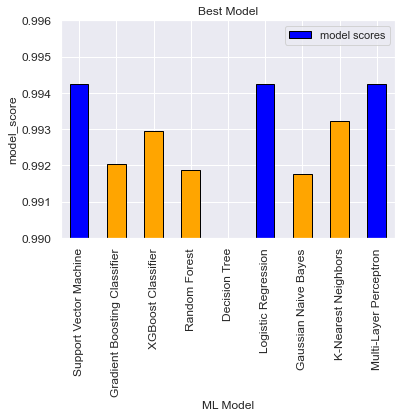

In [145]:
maxx = score_df['model scores'][0]

for i in score_df['model scores']:
    if i > maxx:
        maxx = i
        
colors = []

for i in range(0, len(score_df['model scores'])):
    
    if score_df['model scores'][i] == maxx:
        colors.append('blue')
    else:
        colors.append('orange')

score_df.plot(x = "model" , y = "model scores", kind = "bar" , title = "Best Model", xlabel = "ML Model" , ylabel = "model_score", ylim = (0.99, 0.996), fontsize = 12, color = colors, edgecolor = "black")

In [146]:
## Show model score % in Dataframe

In [147]:
scores_perc = {'model scores in %': [svm_model_score*100, gbc_model_score*100, xgb_model_score*100, ranfor_model_score*100, dectree_model_score*100, logreg_model_score*100, gaussnb_model_score*100, knn_model_score*100, mlp_model_score*100] , 
          'model': ["Support Vector Machine", "Gradient Boosting Classifier", "XGBoost Classifier", "Random Forest", "Decision Tree", "Logistic Regression", "Gaussian Naive Bayes", "K-Nearest Neighbors", "Multi-Layer Perceptron"]}

score_perc_df = pd.DataFrame(scores_perc, columns = ['model', 'model scores in %'])
score_perc_df

,model,model scores in %
0,Support Vector Machine,99.424026
1,Gradient Boosting Classifier,99.204608
2,XGBoost Classifier,99.296032
3,Random Forest,99.186323
4,Decision Tree,98.976047
5,Logistic Regression,99.424026
6,Gaussian Naive Bayes,99.177180
7,K-Nearest Neighbors,99.323459
8,Multi-Layer Perceptron,99.424026


<AxesSubplot:title={'center':'Best Model'}, xlabel='ML Model', ylabel='model_score_in_%'>

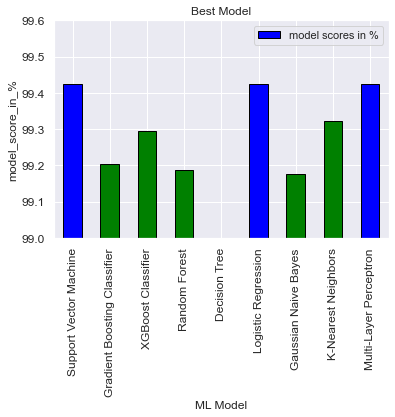

In [149]:
maxx_perc = score_perc_df['model scores in %'][0]

for i in score_perc_df['model scores in %']:
    if i > maxx:
        maxx = i
        
colors = []

for i in range(0, len(score_perc_df['model scores in %'])):
    
    if score_perc_df['model scores in %'][i] == maxx:
        colors.append('blue')
    else:
        colors.append('green')

score_perc_df.plot(x = "model" , y = "model scores in %", kind = "bar" , title = "Best Model", xlabel = "ML Model" , ylabel = "model_score_in_%", ylim = (99, 99.6), fontsize = 12, color = colors, edgecolor = "black")

In [150]:
## Confusion Matrix of Models

In [151]:
from sklearn.metrics import confusion_matrix

In [ ]:
#Support Vector Machine

Text(39.5, 0.5, 'Truth')

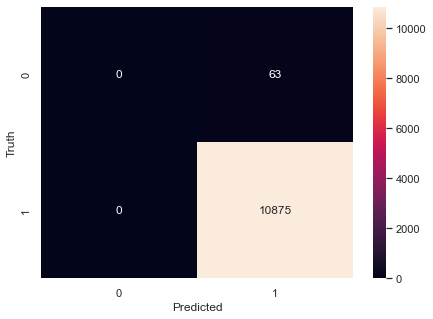

In [152]:
Y_predicted_svm = svm_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_svm)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [153]:
#Gradient Boosting Classifier

Text(39.5, 0.5, 'Truth')

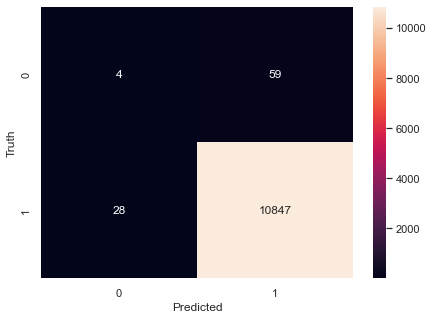

In [154]:
Y_predicted_gbc = gbc_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_gbc)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [155]:
## XG Boost Classifier

Text(39.5, 0.5, 'Truth')

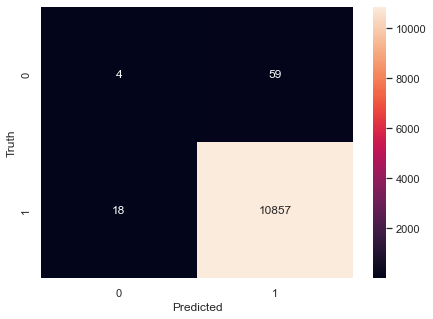

In [156]:
Y_predicted_xgb = xgb_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_xgb)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [157]:
## Random Forest

Text(39.5, 0.5, 'Truth')

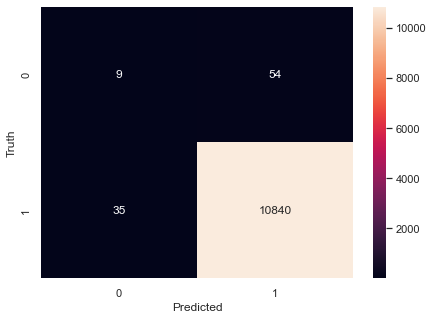

In [158]:
Y_predicted_ranfor = ranfor_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_ranfor)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [159]:
## Decision Tree

Text(39.5, 0.5, 'Truth')

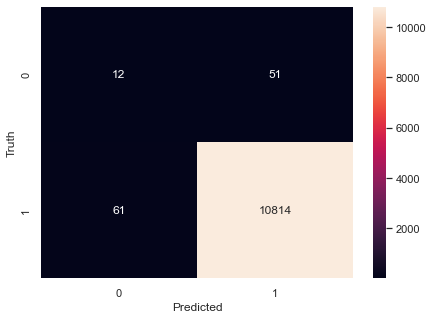

In [160]:
Y_predicted_dectree = dectree_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_dectree)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [161]:
## Logistic Regression

Text(39.5, 0.5, 'Truth')

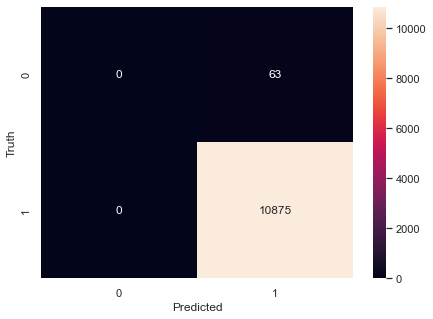

In [162]:
Y_predicted_logreg = logreg_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_logreg)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [163]:
### Gaussian Naive Bayes

Text(39.5, 0.5, 'Truth')

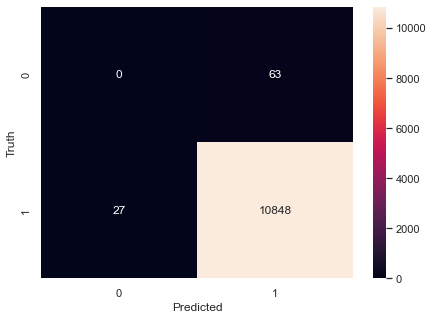

In [164]:
Y_predicted_gaussnb = gaussnb_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_gaussnb)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [165]:
## K-Nearest Neighbours

Text(39.5, 0.5, 'Truth')

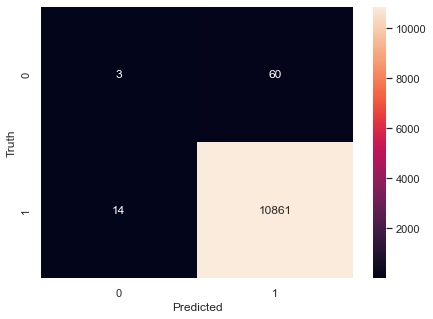

In [166]:
Y_predicted_knn = knn_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_knn)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [167]:
## Multilayer Perceptron

Text(39.5, 0.5, 'Truth')

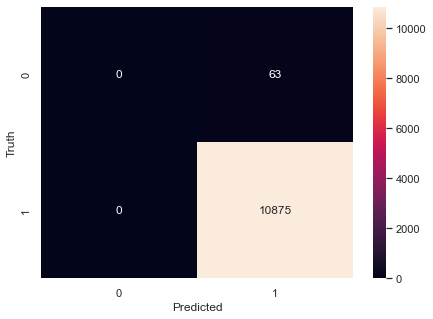

In [168]:
Y_predicted_mlp = mlp_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_mlp)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [169]:
## Classification Reports of Models

In [170]:
from sklearn.metrics import classification_report

In [171]:
## Support Vector Machine

In [172]:
print(classification_report(Y_test, Y_predicted_svm, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.00      0.00      0.00        63
   Credit Card is Approved(1)       0.99      1.00      1.00     10875

                     accuracy                           0.99     10938
                    macro avg       0.50      0.50      0.50     10938
                 weighted avg       0.99      0.99      0.99     10938



In [173]:
## Gradient Boosting Classifier

In [174]:
print(classification_report(Y_test, Y_predicted_gbc, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.12      0.06      0.08        63
   Credit Card is Approved(1)       0.99      1.00      1.00     10875

                     accuracy                           0.99     10938
                    macro avg       0.56      0.53      0.54     10938
                 weighted avg       0.99      0.99      0.99     10938



In [175]:
## XG Boost Classifier

In [176]:
print(classification_report(Y_test, Y_predicted_xgb, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.18      0.06      0.09        63
   Credit Card is Approved(1)       0.99      1.00      1.00     10875

                     accuracy                           0.99     10938
                    macro avg       0.59      0.53      0.55     10938
                 weighted avg       0.99      0.99      0.99     10938



In [177]:
## Random Forest

In [178]:
print(classification_report(Y_test, Y_predicted_ranfor, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.20      0.14      0.17        63
   Credit Card is Approved(1)       1.00      1.00      1.00     10875

                     accuracy                           0.99     10938
                    macro avg       0.60      0.57      0.58     10938
                 weighted avg       0.99      0.99      0.99     10938



In [179]:
## Decision Tree

In [180]:
print(classification_report(Y_test, Y_predicted_dectree, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.16      0.19      0.18        63
   Credit Card is Approved(1)       1.00      0.99      0.99     10875

                     accuracy                           0.99     10938
                    macro avg       0.58      0.59      0.59     10938
                 weighted avg       0.99      0.99      0.99     10938



In [181]:
## Logistic Regression

In [182]:
print(classification_report(Y_test, Y_predicted_logreg, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.00      0.00      0.00        63
   Credit Card is Approved(1)       0.99      1.00      1.00     10875

                     accuracy                           0.99     10938
                    macro avg       0.50      0.50      0.50     10938
                 weighted avg       0.99      0.99      0.99     10938



In [183]:
## Gaussian Naive Bayes

In [184]:
print(classification_report(Y_test, Y_predicted_gaussnb, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.00      0.00      0.00        63
   Credit Card is Approved(1)       0.99      1.00      1.00     10875

                     accuracy                           0.99     10938
                    macro avg       0.50      0.50      0.50     10938
                 weighted avg       0.99      0.99      0.99     10938



In [185]:
## K- Nearest Neighbours

In [186]:
print(classification_report(Y_test, Y_predicted_knn, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.18      0.05      0.07        63
   Credit Card is Approved(1)       0.99      1.00      1.00     10875

                     accuracy                           0.99     10938
                    macro avg       0.59      0.52      0.54     10938
                 weighted avg       0.99      0.99      0.99     10938



In [187]:
## Multilayer Perceptron

In [188]:
print(classification_report(Y_test, Y_predicted_mlp, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.00      0.00      0.00        63
   Credit Card is Approved(1)       0.99      1.00      1.00     10875

                     accuracy                           0.99     10938
                    macro avg       0.50      0.50      0.50     10938
                 weighted avg       0.99      0.99      0.99     10938

